<a href="https://colab.research.google.com/github/savimhl/MLPNS_MSavi/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl

In [2]:
X = np.array(
    [[0,0,1],
     [1,1,1],
     [1,0,1],
     [0,1,1]])

In [3]:
y = np.array([[0,1,1,0]]).T
y

array([[0],
       [1],
       [1],
       [0]])

In [4]:
y.shape

(4, 1)

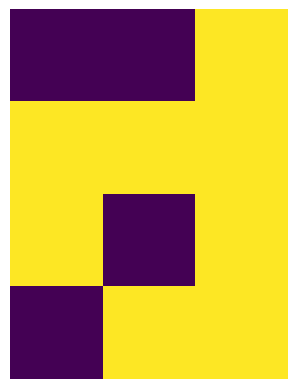

In [5]:

pl.imshow(X);
pl.axis('off');
     

In [6]:
print("input\n", X)
print("output\n", y)

input
 [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output
 [[0]
 [1]
 [1]
 [0]]


#basic architecture: 1 layer

4 osservazioni
3 neuroni
1 layer

In [7]:
def sigmoid(x):
  return 1./ (1. + np.exp(-x))

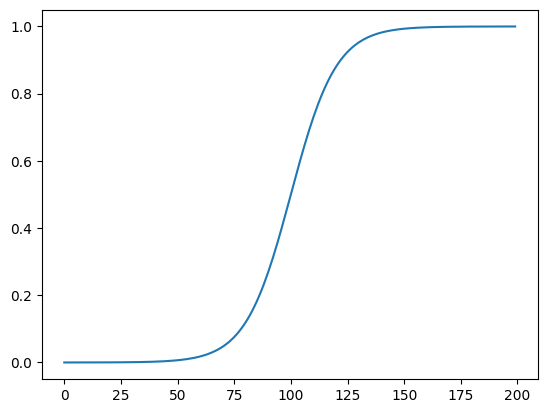

In [8]:
pl.plot(sigmoid(np.arange(-10,10, 0.1)))

In [9]:
def loss(prediction, target):
  return target - prediction

In [10]:
def dsigmoid(x):
  return sigmoid(x) * (1. - sigmoid(x))

##Neural Network

In [11]:
np.random.seed(302)

training = 6000

In [12]:
#layer of synopses / neurons
#4x3

In [13]:
syn0 = 2 * np.random.random((3,1)) - 1
syn0
loss_output=[]

In [14]:
for iter in range(training):
  inputLayer = X
 
  #forward propagation
  l1 = np.dot(inputLayer, syn0)
  #linear regression
  output= sigmoid(l1)
  #activation
  output_error = loss(output, y)
  loss_output.append(np.abs(output_error).sum())

  # backward propagation

  #calculate correction
  output_delta = output_error * dsigmoid(output)
  #apply correction to weights
  syn0 += np.dot(inputLayer.T, output_delta)


print("output after training\n", output)
print("output target\n", y)

output after training
 [[1.20403073e-03]
 [9.98979903e-01]
 [9.99320193e-01]
 [8.02432473e-04]]
output target
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'global loss')

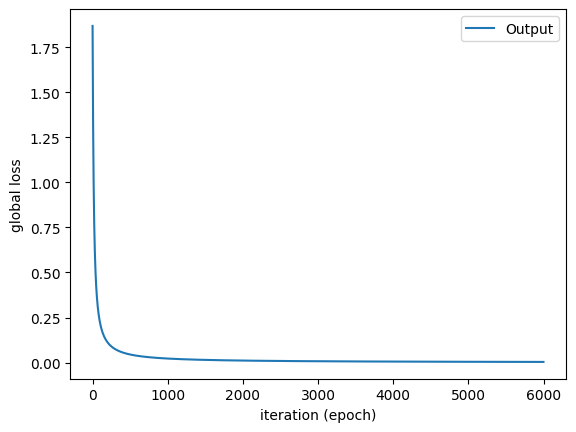

In [15]:
pl.plot(loss_output, label="Output")
pl.legend()
pl.xlabel("iteration (epoch)")
pl.ylabel("global loss")

In [16]:
np.random.seed(302)

# 4x3 -> 3x5 ->5x1 => 4x1
syn0 =  2 * np.random.random((3, 5)) - 1 #normalized 0-1
syn1 =  2 * np.random.random((5, 1)) - 1 #normalized 0-1


loss_output = []
loss_hidden = []

for iter in range(training):
  inputLayer = X

  l1 = np.dot(inputLayer, syn0)
  hidden = sigmoid(l1)
  l2 = np.dot(hidden, syn1)
  output = sigmoid(l2)

  output_error = loss(output, y)
  loss_output.append(np.abs(output_error).sum())


#backward propagation


  output_delta = output_error * dsigmoid(output)
  hidden_error = output_delta.dot(syn1.T)

  loss_hidden.append(np.abs(hidden_error).sum())
  hidden_delta = hidden_error * dsigmoid(hidden)

  syn0 += np.dot(inputLayer.T, hidden_delta)
  syn1 += np.dot(hidden.T, output_delta)

print("output after training\n", output)
print("output target\n", y)
     

output after training
 [[2.37134780e-04]
 [9.99719782e-01]
 [9.99771398e-01]
 [2.38539468e-04]]
output target
 [[0]
 [1]
 [1]
 [0]]


#Parte 2

In [17]:
from tensorflow import keras

In [18]:
hlayer = keras.layers.Dense(5, input_dim = 3, activation="sigmoid")
olayer = keras.layers.Dense(1, activation = "linear")

model = keras.Sequential([hlayer, olayer])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss = "mae", optimizer = "adam", metrics = ["accuracy", "mae"]) # mae = mean absolute error


In [20]:
model.fit(X, y, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 7s 7s/step - loss: 0.9561 - accuracy: 0.5000 - mae: 0.9561
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.9513 - accuracy: 0.5000 - mae: 0.9513
Epoch 3/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.9466 - accuracy: 0.5000 - mae: 0.9466
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.9418 - accuracy: 0.5000 - mae: 0.9418
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.9370 - accuracy: 0.5000 - mae: 0.9370
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.9322 - accuracy: 0.5000 - mae: 0.9322
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.9274 - accuracy: 0.5000 - mae: 0.9274
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.9227 - accuracy: 0.5000 - mae: 0.9227
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.9179 - accuracy: 0.5000

#Part 3

In [21]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [23]:
pl.rcParams["figure.figsize"] = [10,8]
pl.rcParams["image.interpolation"] = "nearest"
pl.rcParams["image.cmap"] = "gist_gray"

In [24]:
cd /content/drive/MyDrive/MLPNS2023

/content/drive/MyDrive/MLPNS2023


In [25]:
ls

kagglehiggs/    spm/                          wine.data.1
kaggleTitanic/  spm-20210427T111354Z-001.zip  wine.names
model.png       wine.data                     wine.names.1


In [26]:
!unzip spm-20210427T111354Z-001.zip

Archive:  spm-20210427T111354Z-001.zip
replace spm/spm_struct_pos.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [27]:
data = np.load("spm/train_good_all.npy")

In [28]:
data.shape

(1302, 64, 64)

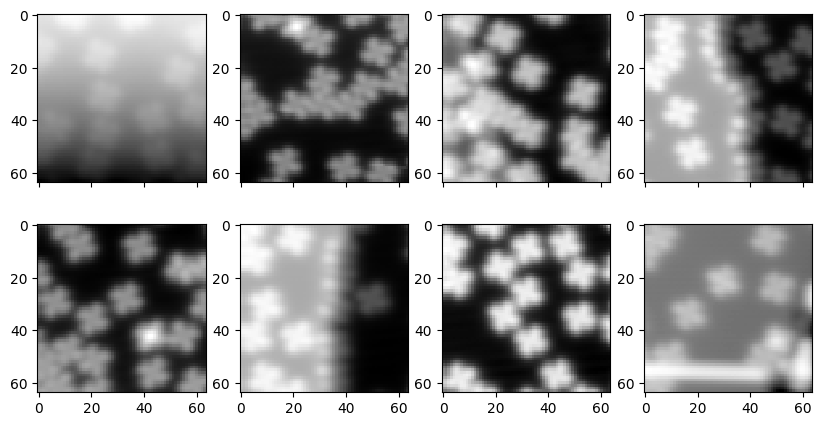

In [29]:
fig, ax = plt.subplots(2, 4, figsize = [10,5], sharex = True)

for ii in range(8):
  ax   [ii // 4, ii % 4].imshow(data[ii])

(array([ 254226.,  957465., 1143646., 1050540.,  825288.,  338534.,
         391059.,  151471.,  179803.,   40960.]),
 array([-1.07775726e-07, -9.55749615e-08, -8.33741970e-08, -7.11734324e-08,
        -5.89726678e-08, -4.67719032e-08, -3.45711387e-08, -2.23703741e-08,
        -1.01696095e-08,  2.03115507e-09,  1.42319196e-08]),
 <BarContainer object of 10 artists>)

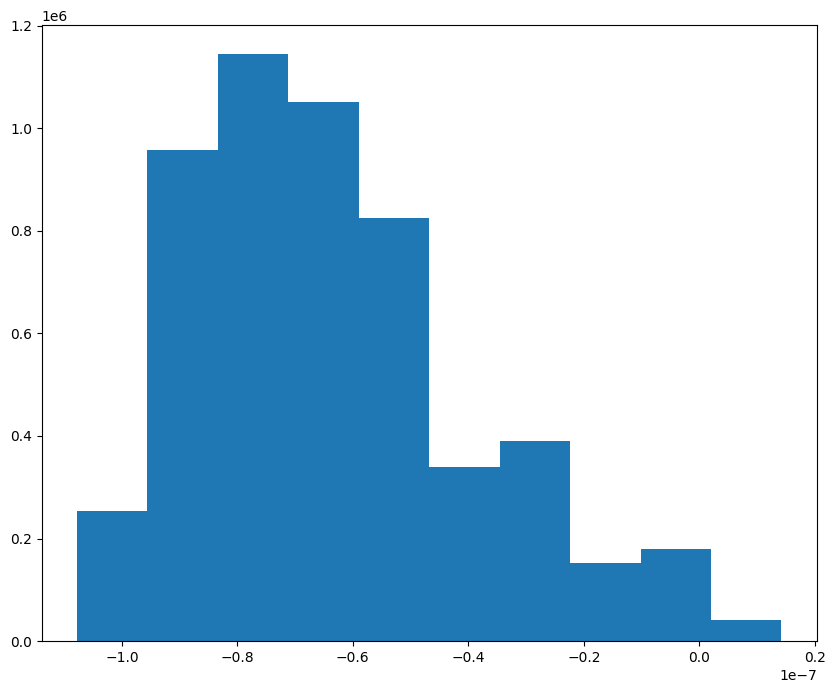

In [30]:
plt.hist(data.flatten())

In [31]:
#norm = ( D - MIN(D)) / RANGE(D)
norm = (data - data.min(axis = (1,2), keepdims = True)) / (data.max(axis = (1,2), keepdims = True) - data.min(axis = (1,2), keepdims = True))

In [32]:
norm.shape

(1302, 64, 64)

In [33]:
norm.min(), norm.max()

(0.0, 1.0)

In [34]:
pos = np.load("spm/spm_struct_pos.npy")
neg = np.load("spm/spm_struct_neg.npy")

In [35]:
pos.shape

(500, 3)

In [36]:
neg.shape

(500, 3)

In [37]:
pos[0]

array([30, 25, 51])

In [38]:
pos.max(axis = 0)

array([  62,   62, 1300])

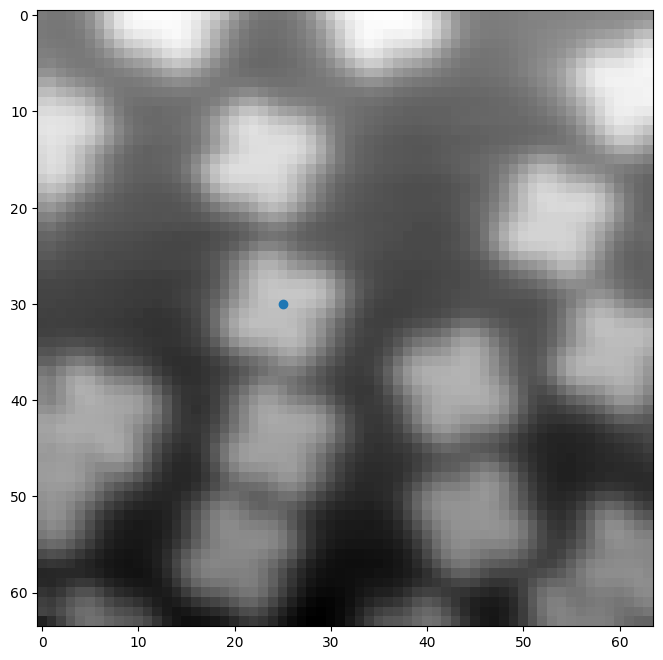

In [39]:
plt.imshow(norm[pos[0][2]])
plt.plot(pos[0][1], pos[0][0], 'o')

In [40]:
wid = 10
stmp_pos = []
for ii in range(pos.shape[0]):
  trow, tcol, tind = pos[ii]
  if (trow > wid) & (trow < 64 - wid) & (tcol > wid) & (tcol < 64 - wid):
    stmp_pos.append(norm[tind, trow-wid:trow+wid, tcol-wid:tcol+wid,])

stmp_pos = np.array(stmp_pos)

In [41]:
stmp_pos.shape

(389, 20, 20)

In [42]:
pos.shape[0]

500

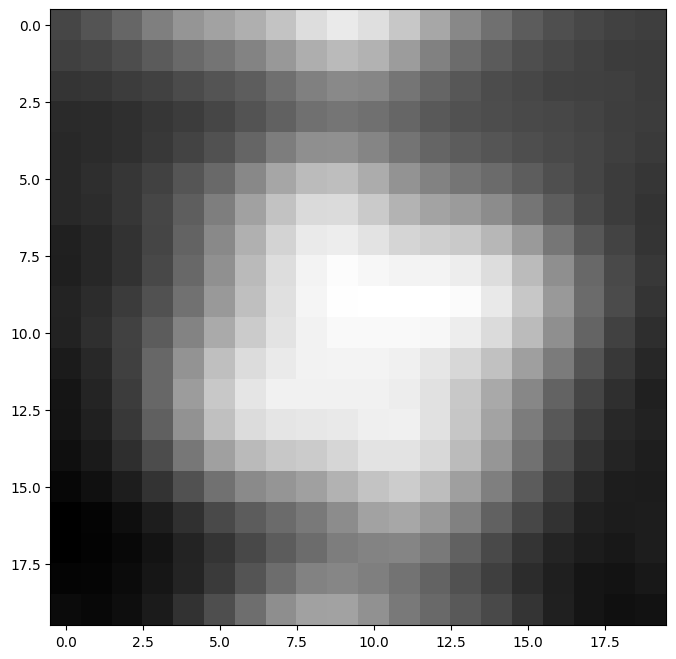

In [43]:
plt.imshow(stmp_pos[0])

In [44]:
wid = 10
stmp_neg = []
for ii in range(neg.shape[0]):
  trow, tcol, tind = neg[ii]
  if (trow > wid) & (trow < 64 - wid) & (tcol > wid) & (tcol < 64 - wid):
    stmp_neg.append(norm[tind, trow-wid:trow+wid, tcol-wid:tcol+wid,])

stmp_neg = np.array(stmp_neg)

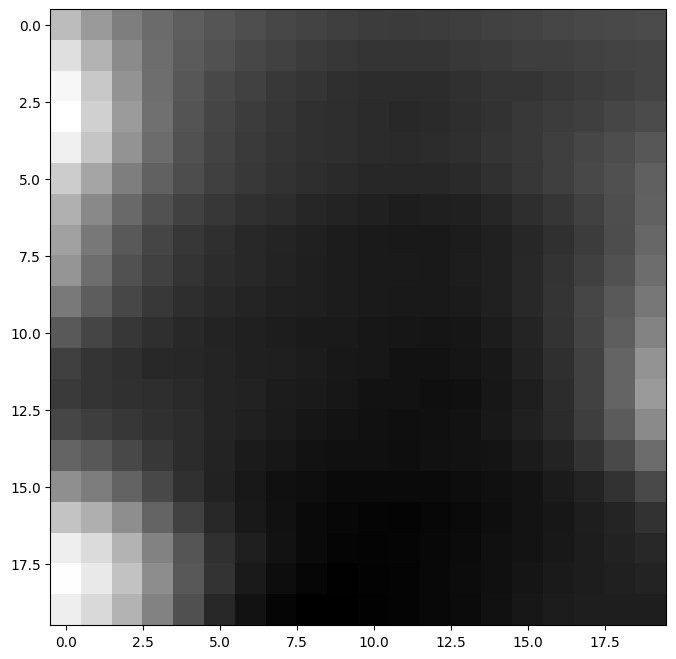

In [45]:
plt.imshow(stmp_neg[0])

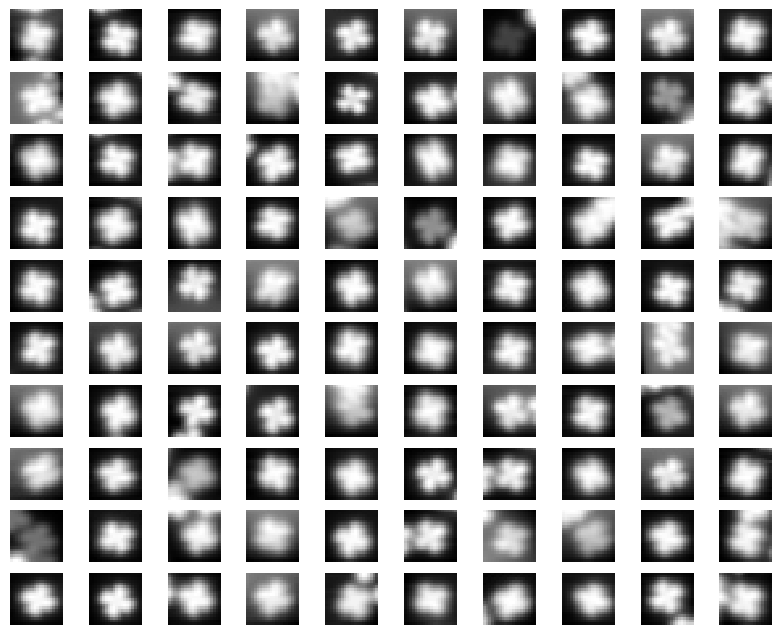

In [46]:
# plot  positive examples
fig, ax = plt.subplots(10, 10)
for ii in range(100):
    ax[ii // 10, ii % 10].imshow(stmp_pos[ii])
    ax[ii // 10, ii % 10].axis("off")

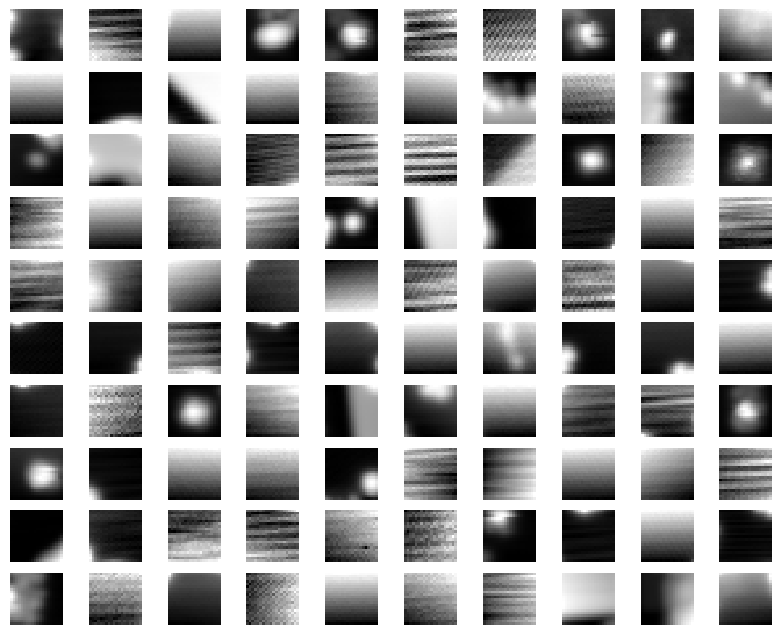

In [47]:
# plot  positive examples
fig, ax = plt.subplots(10, 10)
for ii in range(100):
    ax[ii // 10, ii % 10].imshow(stmp_neg[ii])
    ax[ii // 10, ii % 10].axis("off")

In [48]:
feat = np.concatenate((stmp_neg, stmp_pos), axis=0)
targ = np.concatenate((np.zeros(stmp_neg.shape[0]), 
                      np.ones(stmp_pos.shape[0])))

In [49]:
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, random_state = 302, shuffle = True)

In [50]:
feat_tr.shape

(655, 20, 20)

In [51]:
feat_tr = np.expand_dims(feat_tr, axis = 3)

In [52]:
feat_te = np.expand_dims(feat_te, axis = 3)

In [53]:
feat_tr.shape, feat_te.shape

((655, 20, 20, 1), (219, 20, 20, 1))

In [54]:
layer1 = keras.layers.Conv2D(16, kernel_size = (5,5), padding = "same",
                             activation = "relu",
                             input_shape=(2 * wid, 2*wid, 1),
                             kernel_regularizer = keras.regularizers.l2(0.001))

layer2 = keras.layers.MaxPool2D(pool_size=(2,2), padding = "same")

layer3 = keras.layers.Conv2D(32, kernel_size = (5,5), padding = "same",
                             activation = "relu",
                             input_shape=(2 * wid, 2*wid, 1),
                             kernel_regularizer = keras.regularizers.l2(0.001))

layer4 = keras.layers.MaxPool2D(pool_size=(2,2), padding = "same")

layer5 = keras.layers.Flatten()

layer6 = keras.layers.Dense(64, input_dim = 3, activation="relu")

layer7 = keras.layers.Dense(2, activation = "softmax")

layers = [layer1, layer2, layer3, layer4, layer5, layer6, layer7]

model = keras.Sequential(layers)
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 64)               

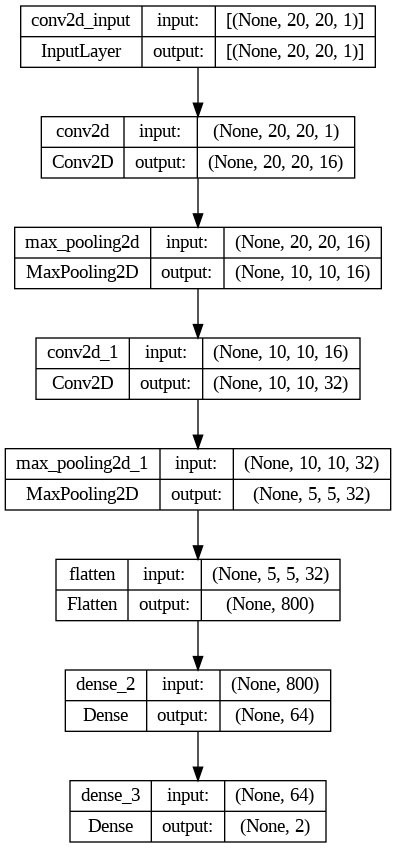

In [55]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [56]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = "accuracy")


In [57]:
history = model.fit(feat_tr, targ_tr, epochs = 50,
                    batch_size = 50, validation_split = 0.1)

Epoch 1/50
12/12 [==============================] - 7s 39ms/step - loss: 0.5910 - accuracy: 0.7759 - val_loss: 0.4799 - val_accuracy: 0.8030
Epoch 2/50
12/12 [==============================] - 0s 8ms/step - loss: 0.4134 - accuracy: 0.8913 - val_loss: 0.2890 - val_accuracy: 0.9242
Epoch 3/50
12/12 [==============================] - 0s 8ms/step - loss: 0.3047 - accuracy: 0.9066 - val_loss: 0.2445 - val_accuracy: 0.9091
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 0.2513 - accuracy: 0.9236 - val_loss: 0.2199 - val_accuracy: 0.9091
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2098 - accuracy: 0.9406 - val_loss: 0.2228 - val_accuracy: 0.8939
Epoch 6/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1951 - accuracy: 0.9355 - val_loss: 0.1653 - val_accuracy: 0.9545
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 0.1675 - accuracy: 0.9457 - val_loss: 0.1796 - val_accuracy: 0.9394
Epoch 8/50
12/12 [=

In [58]:
history.history["val_accuracy"]

[0.8030303120613098,
 0.9242424368858337,
 0.9090909361839294,
 0.9090909361839294,
 0.8939393758773804,
 0.9545454382896423,
 0.939393937587738,
 0.9242424368858337,
 0.9545454382896423,
 0.9545454382896423,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9848484992980957,
 0.9696969985961914,
 0.9696969985961914,
 0.9545454382896423,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9545454382896423,
 0.9848484992980957,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.9696969985961914,
 0.96969699859

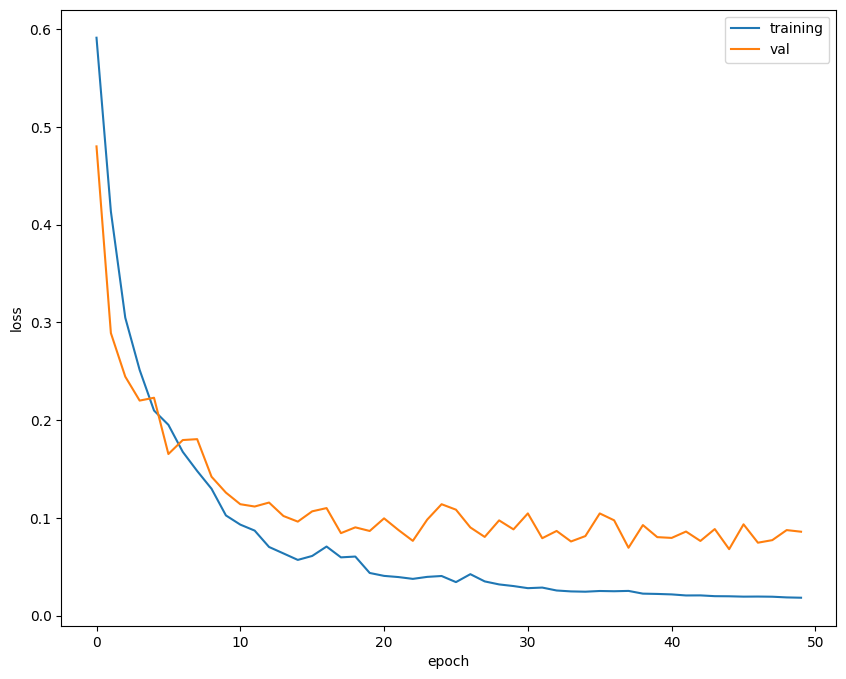

In [59]:
plt.plot(history.history["loss"], label = "training")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

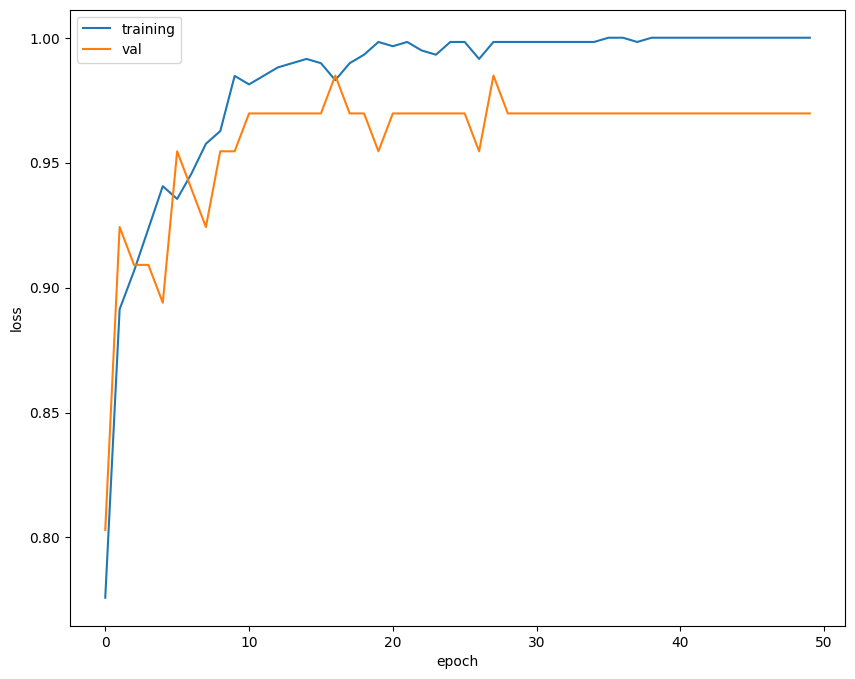

In [60]:
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
     

In [61]:
loss_tr, acc_tr = model.evaluate(feat_tr, targ_tr)
loss_te, acc_te = model.evaluate(feat_te, targ_te)
print('{:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(loss_tr, acc_tr, loss_te, acc_te))
     

7/7 [==============================] - 0s 11ms/step - loss: 0.1296 - accuracy: 0.9863
0.02, 1.00, 0.13, 0.99


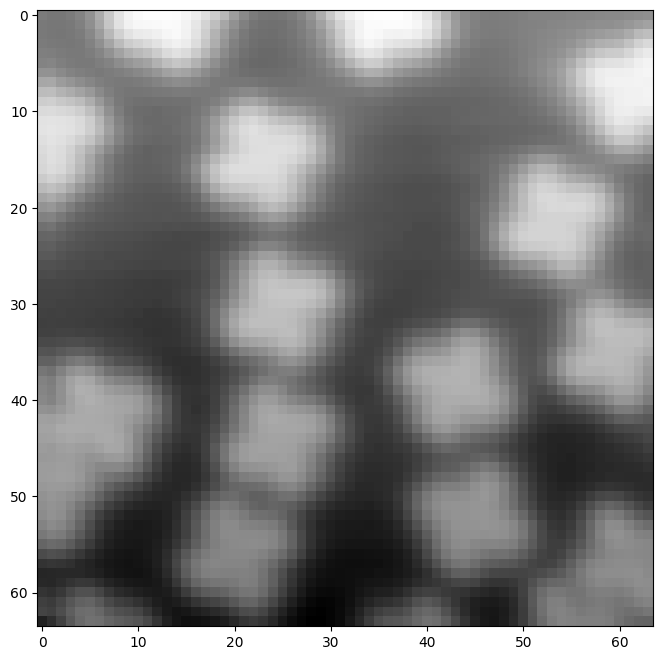

In [63]:
plt.imshow(norm[51])

In [68]:
img = norm[51].copy()

nrow, ncol = img.shape
stamps = np.zeros(((nrow - wid * 2) * (ncol - wid*2), 2* wid, 2*wid)) #nimg nrows ncols
stamps.shape

kk = 0
for ii in range(wid, nrow - wid): #rows
  for jj in range(wid, ncol - wid): #cols
    stamps[kk] = img[ii - wid: ii+wid, jj - wid: jj+wid]
    kk += 1


feat_stmp = np.expand_dims(stamps, axis= 3)

In [69]:
pred = model.predict(feat_stmp)

61/61 [==============================] - 0s 2ms/step


In [71]:
pred

array([[1.0000000e+00, 5.6701207e-15],
       [1.0000000e+00, 6.1331517e-16],
       [1.0000000e+00, 1.2342836e-16],
       ...,
       [1.0000000e+00, 3.2971081e-09],
       [1.0000000e+00, 1.3437770e-08],
       [9.9999976e-01, 2.9563316e-07]], dtype=float32)

In [72]:
pred.shape

(1936, 2)

In [73]:
pimg = np.zeros(img.shape)
pimg[wid:nrow-wid, wid:ncol-wid] = pred[:, 1].reshape(nrow - 2 * wid, ncol - 2 * wid)


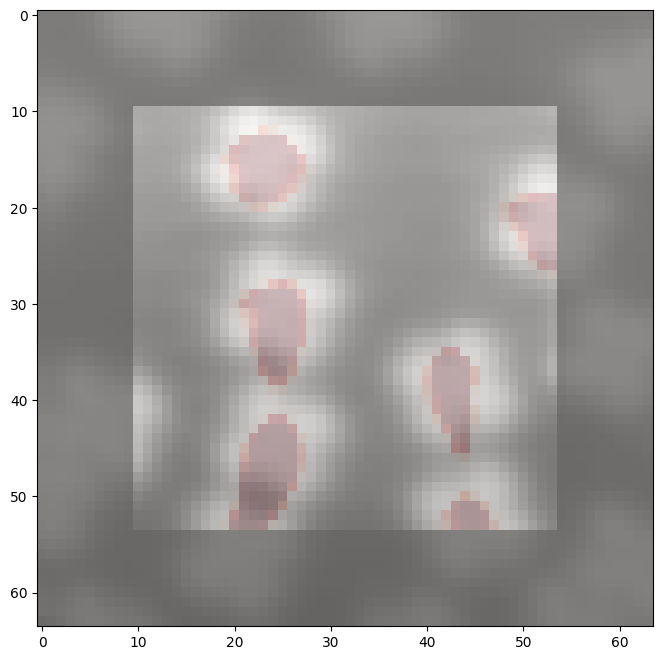

In [77]:
plt.imshow(img, alpha=0.5)
actualimg = img.copy()
actualimg[:wid,:] = 0
actualimg[-wid:,:] = 0
actualimg[:,:wid] = 0
actualimg[:,-wid:] = 0
plt.imshow(actualimg, alpha=0.5)
plt.imshow(pimg, cmap="Reds", alpha=0.2)